In [1]:
from google.colab import files
uploaded = files.upload()


Saving student_feedback.csv to student_feedback (1).csv


In [2]:
!pip install vaderSentiment
!pip install matplotlib
!pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("student_feedback.csv")
df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [5]:
df.columns.tolist()



['Unnamed: 0',
 'Student ID',
 'Well versed with the subject',
 'Explains concepts in an understandable way',
 'Use of presentations',
 'Degree of difficulty of assignments',
 'Solves doubts willingly',
 'Structuring of the course',
 'Provides support for students going above and beyond',
 'Course recommendation based on relevance']

In [6]:
rating_cols = ['Unnamed: 0',
 'Student ID',
 'Well versed with the subject',
 'Explains concepts in an understandable way',
 'Use of presentations',
 'Degree of difficulty of assignments',
 'Solves doubts willingly',
 'Structuring of the course',
 'Provides support for students going above and beyond',
 'Course recommendation based on relevance']
df['Overall_Satisfaction'] = df[rating_cols].mean(axis=1)
df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance,Overall_Satisfaction
0,0,340,5,2,7,6,9,2,1,8,38.0
1,1,253,6,5,8,6,2,1,2,9,29.3
2,2,680,7,7,6,5,4,2,3,1,71.7
3,3,806,9,6,7,1,5,9,4,6,85.6
4,4,632,8,10,8,4,6,6,9,9,69.6


In [7]:
df = df.drop(columns=['Unnamed: 0'])


In [8]:
df.columns.tolist()


['Student ID',
 'Well versed with the subject',
 'Explains concepts in an understandable way',
 'Use of presentations',
 'Degree of difficulty of assignments',
 'Solves doubts willingly',
 'Structuring of the course',
 'Provides support for students going above and beyond',
 'Course recommendation based on relevance',
 'Overall_Satisfaction']

In [9]:
import pandas as pd

rating_cols = [
    'Well versed with the subject',
    'Explains concepts in an understandable way',
    'Use of presentations',
    'Degree of difficulty of assignments',
    'Solves doubts willingly',
    'Structuring of the course',
    'Provides support for students going above and beyond',
    'Course recommendation based on relevance'
]

avg_scores = df[rating_cols].mean().sort_values(ascending=False)
avg_scores


,0
Well versed with the subject,7.497502
Explains concepts in an understandable way,6.081918
Use of presentations,5.942058
Provides support for students going above and beyond,5.662338
Structuring of the course,5.636364
Course recommendation based on relevance,5.598402
Solves doubts willingly,5.474525
Degree of difficulty of assignments,5.430569


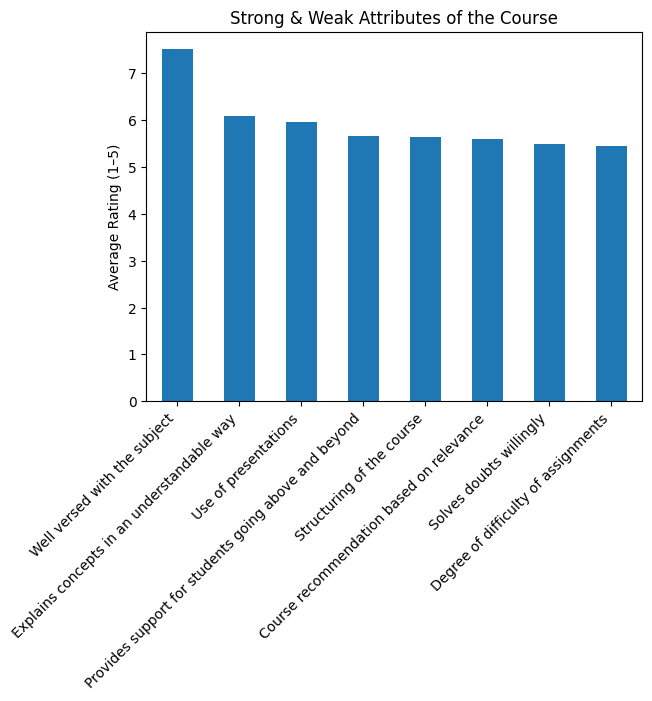

In [10]:
import matplotlib.pyplot as plt

avg_scores.plot(kind='bar')
plt.ylabel("Average Rating (1–5)")
plt.title("Strong & Weak Attributes of the Course")
plt.xticks(rotation=45, ha='right')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[rating_cols]
y = df['Overall_Satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Prediction accuracy (R²):", model.score(X_test, y_test))


Prediction accuracy (R²): -0.005055223209818216


In [12]:
# Create a list of sample feedback sentences (same length as your dataset)
sample_feedback = [
    "The teacher explains concepts very clearly and is supportive.",
    "Presentations were useful but sometimes too fast.",
    "Assignments were challenging but helped me understand the subject.",
    "Course was well structured but could include more real life examples.",
    "I struggled with some concepts but doubts were solved nicely.",
    "The instructor goes beyond to help students, very impressed.",
    "Sometimes classes felt rushed but overall very informative.",
    "Would recommend this course to others, very relevant content.",
    "Needs better presentations but explanations are great.",
    "Exceptional teaching style, assignments could be easier.",
]

# Repeat or trim feedback list to match your dataset length
df['Feedback'] = (sample_feedback * (len(df)//len(sample_feedback)+1))[:len(df)]

df.head()


,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance,Overall_Satisfaction,Feedback
0,340,5,2,7,6,9,2,1,8,38.0,The teacher explains concepts very clearly and...
1,253,6,5,8,6,2,1,2,9,29.3,Presentations were useful but sometimes too fast.
2,680,7,7,6,5,4,2,3,1,71.7,Assignments were challenging but helped me und...
3,806,9,6,7,1,5,9,4,6,85.6,Course was well structured but could include m...
4,632,8,10,8,4,6,6,9,9,69.6,I struggled with some concepts but doubts were...


In [13]:
!pip install textblob


In [14]:
from textblob import TextBlob

df['Sentiment_Polarity'] = df['Feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)
df[['Feedback', 'Sentiment_Polarity']].head()


,Feedback,Sentiment_Polarity
0,The teacher explains concepts very clearly and...,0.315000
1,Presentations were useful but sometimes too fast.,0.250000
2,Assignments were challenging but helped me und...,0.166667
3,Course was well structured but could include m...,0.350000
4,I struggled with some concepts but doubts were...,0.600000


In [15]:
def categorize_sentiment(score):
    if score > 0.2:
        return "Positive"
    elif score < -0.2:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment_Label'] = df['Sentiment_Polarity'].apply(categorize_sentiment)
df[['Feedback', 'Sentiment_Label']].head()


,Feedback,Sentiment_Label
0,The teacher explains concepts very clearly and...,Positive
1,Presentations were useful but sometimes too fast.,Positive
2,Assignments were challenging but helped me und...,Neutral
3,Course was well structured but could include m...,Positive
4,I struggled with some concepts but doubts were...,Positive


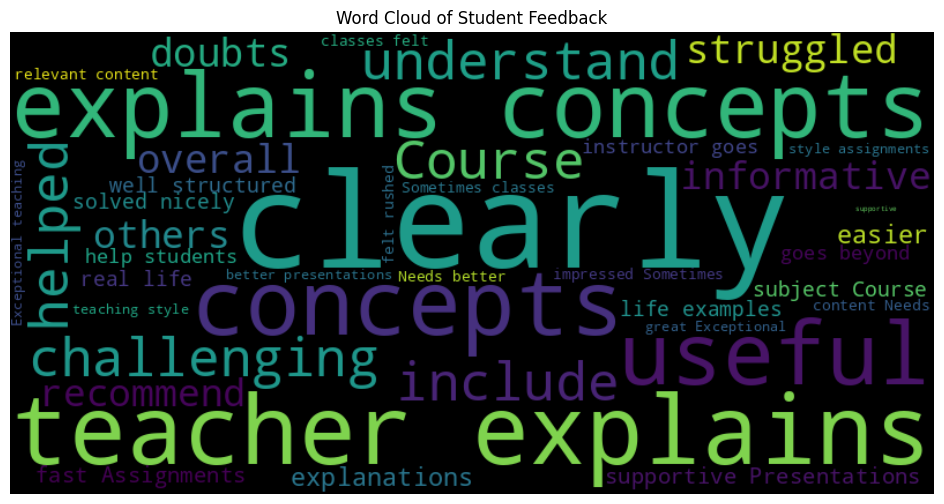

In [16]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_feedback = " ".join(df['Feedback'])

wordcloud = WordCloud(width=800, height=400).generate(all_feedback)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Student Feedback")
plt.show()


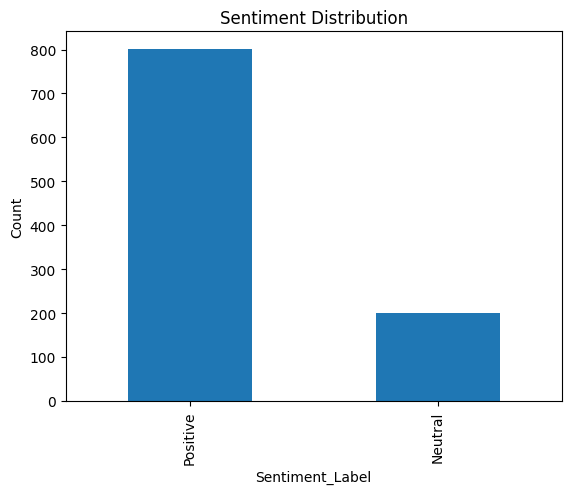

In [17]:
df['Sentiment_Label'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.ylabel("Count")
plt.show()
